<a href="https://colab.research.google.com/github/kitawa333-svg/air-quality-eda/blob/main/Indian_AQI_Data_Analysis_PRAC_1_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Indian Air Quality Data Analysis**

#####We are analyzing air quality data from multiple Indian cities 📊.
#####The goal is to combine city datasets, explore the data, and perform visual analysis to understand air quality trends.
---



In [45]:
#libraries for data analysis
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

### **Mount the drive**

---



In [46]:
from google.colab import drive #connecting the drive to google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# the drive path of the csv folder
drive_path=('/content/drive/MyDrive/Indian air quality')

In [48]:
# the csv files in the csv folder
%ls '/content/drive/MyDrive/Indian air quality'

Ahmedabad_data.csv     Coimbatore_data.csv  Kolkata_data.csv
Aizawl_data.csv        Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv     Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv      Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv     Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv        Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv  Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv    Jorapokhar_data.csv  Visakhapatnam_data.csv
Chennai_data.csv       Kochi_data.csv


### **Combain CSV files into one CSV file**

---



In [49]:
import glob #find files by name patterns

In [50]:
city_files = glob.glob(os.path.join(drive_path, "*_data.csv")) #find files that have'.csv'

all_cities_data = [] #putting each city's data in this list b4 combining them

for file_name in city_files:

    city_df = pd.read_csv(file_name) #read the current city's CSV file into a DataFrame

    all_cities_data.append(city_df) #adds the cityies data to our list

    print(f"Loaded: {file_name}") #print which file we just read

combined_data = pd.concat(all_cities_data, ignore_index=True) #pd.concat() joins all the DataFrames in our list together, ignore_index=True - makes row numbers continuous

combined_data.to_csv("all_cities_combined.csv", index=False) #index=False - don't save the row numbers as a separate column

print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows") #len(city_files) = count of how many city files are combined; len(combined_data) = total no. of rows in the final file
print("The combined file is saved as: all_Indian_cities_combined.csv")

Loaded: /content/drive/MyDrive/Indian air quality/Guwahati_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Patna_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Kochi_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Hyderabad_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Visakhapatnam_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Ahmedabad_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Jorapokhar_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Kolkata_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Delhi_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Ernakulam_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Shillong_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Amaravati_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Bhopal_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Coimbatore_data.csv
Loaded: /content/drive/MyDrive/Indian air quali

### **Load and Inspect Combined Dataset**

---



In [51]:
df= pd.read_csv('all_cities_combined.csv') #reads the csv files into the Dataframe
print (df) #prints the contents of the new csv file

            City        Date   PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0       Guwahati  16/02/2019  124.77  187.08   NaN    NaN    NaN    NaN   NaN   
1       Guwahati  17/02/2019   50.82  118.01  4.03   9.30  16.56  29.24  0.48   
2       Guwahati  18/02/2019   58.31   85.39  3.67  10.82  17.63  23.60  0.47   
3       Guwahati  19/02/2019   59.88   78.04  3.16   9.65  15.51  19.03  0.51   
4       Guwahati  20/02/2019   55.61   92.36  2.89  11.71  17.30  16.68  0.49   
...          ...         ...     ...     ...   ...    ...    ...    ...   ...   
29526  Bengaluru  27/06/2020   16.60   29.48  3.06  13.68  13.07   6.88  0.67   
29527  Bengaluru  28/06/2020   20.44   26.34  2.69  10.33  10.58   6.58  0.66   
29528  Bengaluru  29/06/2020   28.68   29.27  3.62  12.12  12.94   6.80  0.56   
29529  Bengaluru  30/06/2020   14.47   24.26  4.61  12.69  15.00   6.82  0.56   
29530  Bengaluru  01/07/2020   17.50   30.48  3.95  13.25  14.83   7.42  0.54   

         SO2     O3  Benzen

In [52]:
df.shape #show the number of columns and rows
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}') #shows the no. of rows and columns

No of Rows: 29531, No of Columns: 16


In [53]:
df.head() #shows the first 5 rows of the data set

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Guwahati,16/02/2019,124.77,187.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guwahati,17/02/2019,50.82,118.01,4.03,9.30,16.56,29.24,0.48,14.03,17.67,1.07,NaN,NaN,92.0,Satisfactory
2,Guwahati,18/02/2019,58.31,85.39,3.67,10.82,17.63,23.60,0.47,14.47,33.85,0.88,NaN,NaN,122.0,Moderate
3,Guwahati,19/02/2019,59.88,78.04,3.16,9.65,15.51,19.03,0.51,16.42,41.23,1.00,NaN,NaN,80.0,Satisfactory
4,Guwahati,20/02/2019,55.61,92.36,2.89,11.71,17.30,16.68,0.49,27.07,44.89,0.98,NaN,NaN,105.0,Moderate


In [54]:
df.columns #lists all column names

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [55]:
df.info() #summary of data types, column names and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [56]:
df.describe() #summary for numeric columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [57]:
df.isnull().sum() #look for missing values

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


### **Data Cleaning**

---



In [58]:
df = df.drop_duplicates()  #removes duplicate rows if any are found

In [59]:
df.isnull().sum() #confirms missing values after duplicate removal

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [60]:
numeric_columns = df.select_dtypes(include=['float64']).columns  #selects only numeric columns for analysis

In [61]:
df[numeric_columns].isnull().mean().sort_values(ascending=False) #calculates the proportion of missing values in each numeric column


,0
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196
SO2,0.130507


In [62]:
df_clean = df.copy()  #makes a separate working copy of the dataset

In [63]:
df_clean = df_clean.dropna(subset=['AQI'])  #removes rows where AQI is missing

Rows with missing AQI values were removed, as AQI is the primary outcome variable in this analysis.  
Missing values in other pollutant variables were retained, as they reflect real-world monitoring limitations rather than data errors.

---



In [64]:
df_clean.shape  #displays the new dataset size after cleaning


(24850, 16)

In [65]:
df_clean.isnull().sum()  #confirms that AQI no longer contains missing values

,0
City,0
Date,0
PM2.5,678
PM10,7086
NO,387
NO2,391
NOx,1857
NH3,6536
CO,445
SO2,605


### **EDA VISUALISATIONS**

### **Data Distribution Analysis**

This section examines the distribution of AQI values and key pollutants to understand overall patterns, skewness, and variability in air quality levels.


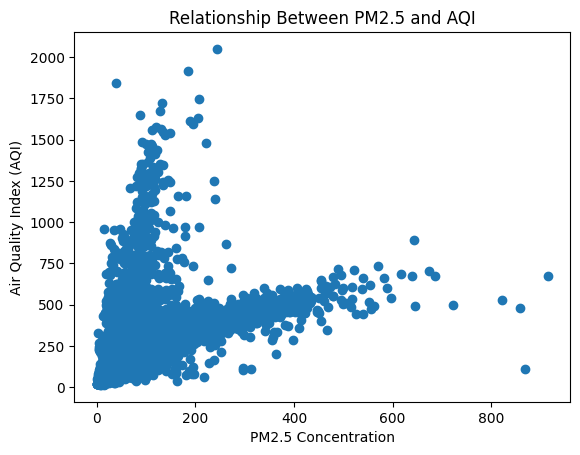

In [66]:
#making a scatter plot
plt.figure()
plt.scatter(df_clean['PM2.5'], df_clean['AQI'])  # Plots PM2.5 concentration against AQI
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between PM2.5 and AQI')
plt.show()



**Interpretation:**  
The scatter plot shows a clear positive relationship between PM2.5 concentration and AQI. Higher PM2.5 levels are generally associated with worse air quality, indicating that fine particulate matter is a major contributor to AQI deterioration.


---



In [67]:
correlation_matrix = df_clean[numeric_columns].corr()  #calculates the correlation matrix for numeric variables; Correlation shows strength and direction of relationships between variables

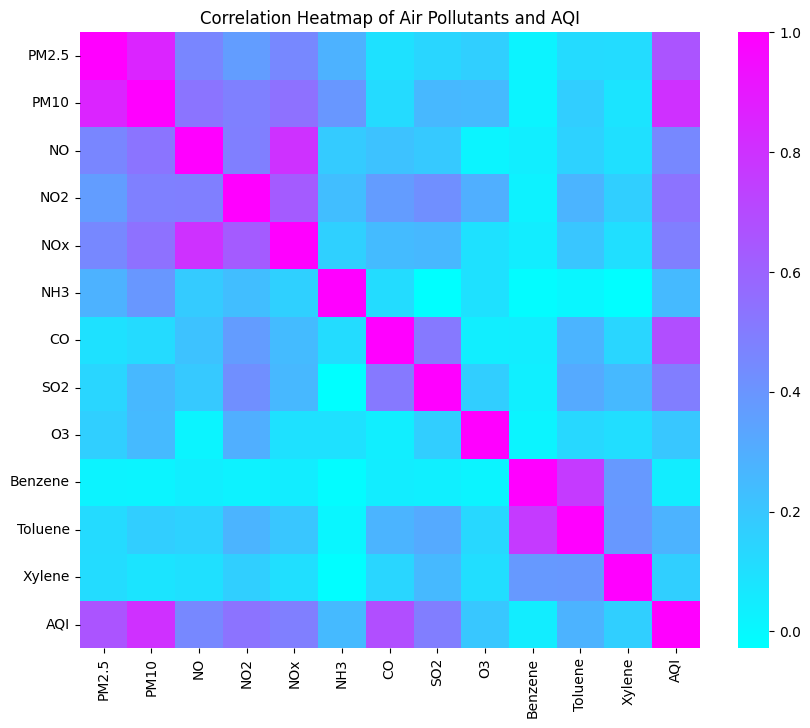

In [68]:
#making a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cool')  #plots a heatmap of correlations; annot=False avoids cluttering the plot with numbers
plt.title('Correlation Heatmap of Air Pollutants and AQI')
plt.show()

**Interpretation:**  
The heatmap indicates strong positive correlations between AQI and particulate pollutants such as PM2.5 and PM10. Gaseous pollutants show weaker relationships, suggesting particulate matter plays a dominant role in air quality levels.


---



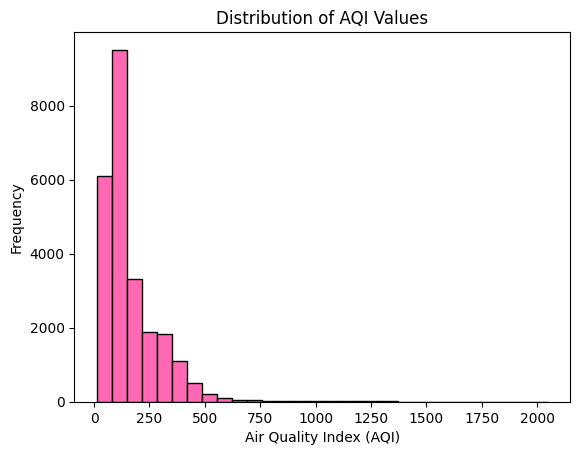

In [69]:
#making a histogram
plt.figure()
plt.hist( df_clean['AQI'], bins=30, color='hotpink', edgecolor='black')   # Uses AQI values from the cleaned datase and splits the data into 30 intervals
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.show()


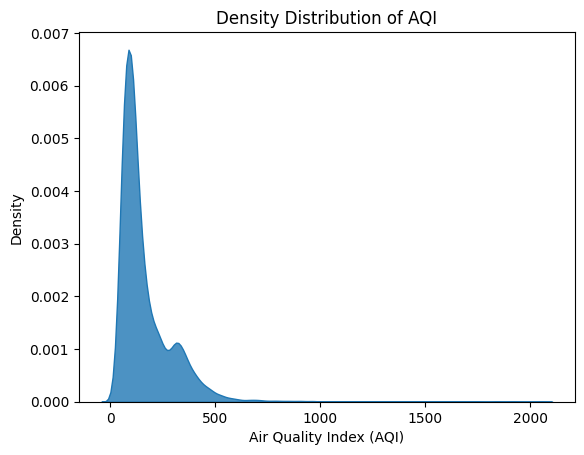

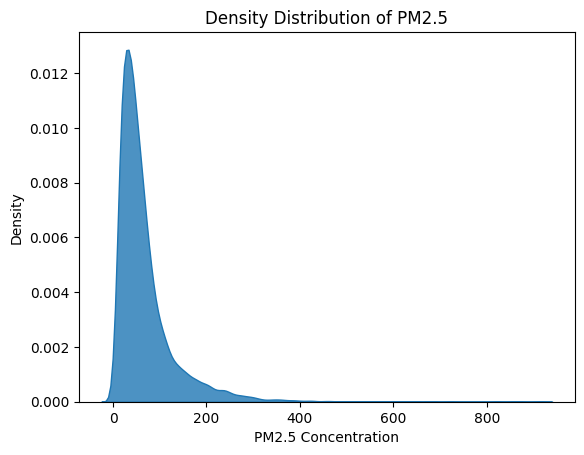

In [70]:
#making a density (gradient) plot
plt.figure()
sns.kdeplot(df_clean['AQI'], fill=True, cmap='RdPu', alpha=0.8)  #shows smooth AQI distribution using pink-purple gradient
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Density')
plt.title('Density Distribution of AQI')
plt.show()

#making a density (gradient) plot
plt.figure()
sns.kdeplot(df_clean['PM2.5'], fill=True, cmap='RdPu', alpha=0.8)  #smooth PM2.5 distribution using pink-purple gradient
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Density')
plt.title('Density Distribution of PM2.5')
plt.show()



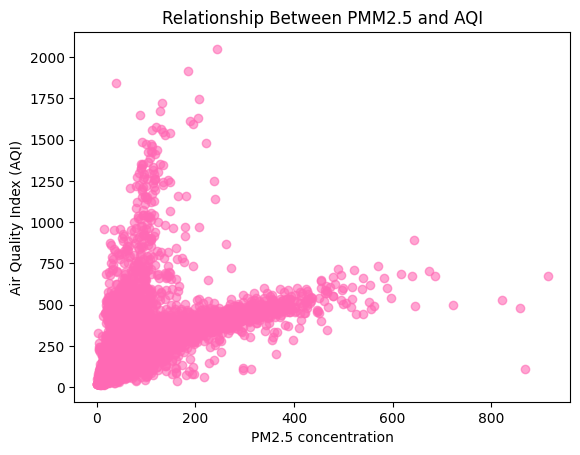

In [71]:
#making a scatter plot
plt.figure()
plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='hotpink', alpha=0.6) #PM2.5 values corresponding AQI values
plt.xlabel('PM2.5 concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between PMM2.5 and AQI')
plt.show()

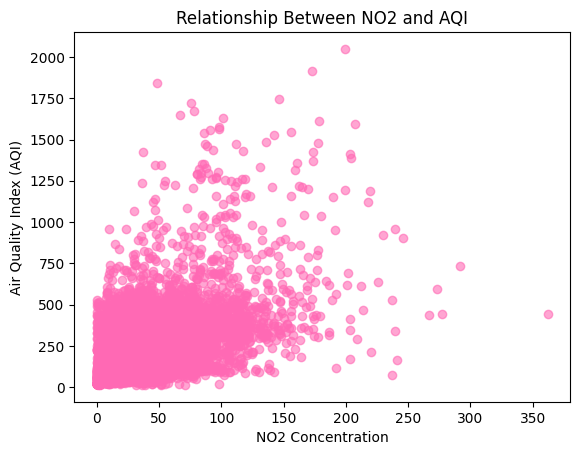

In [72]:
#making a scatter plot
plt.figure()
plt.scatter(df_clean['NO2'], df_clean['AQI'], color='hotpink', alpha=0.6)  #plots NO2 concentration against AQI
plt.xlabel('NO2 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between NO2 and AQI')
plt.show()


In [73]:
correlation_matrix = df_clean[numeric_columns].corr()  #calculates correlation coefficients between all numeric variables

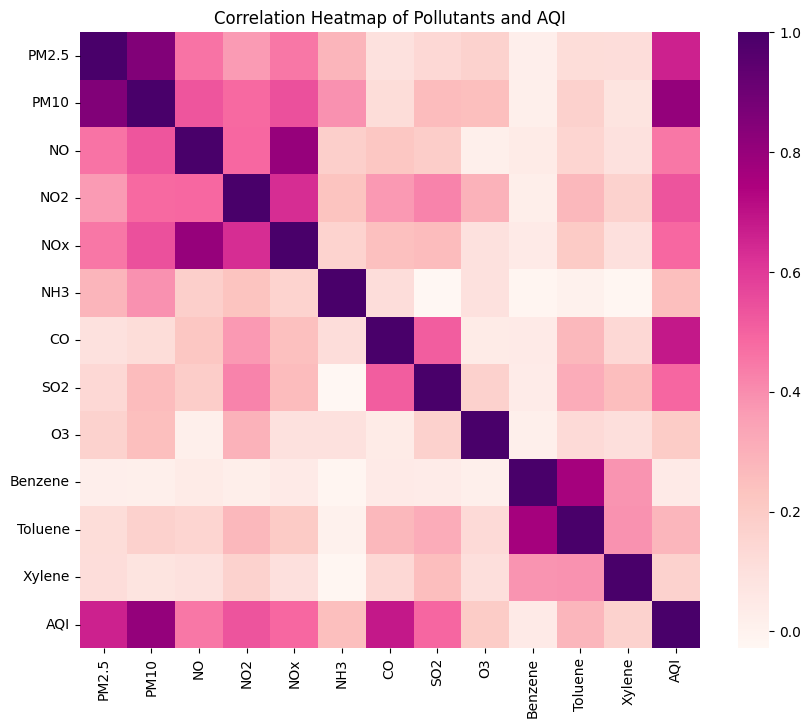

In [74]:
#make a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='RdPu', annot=False) #uses the correlation matrix as input
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

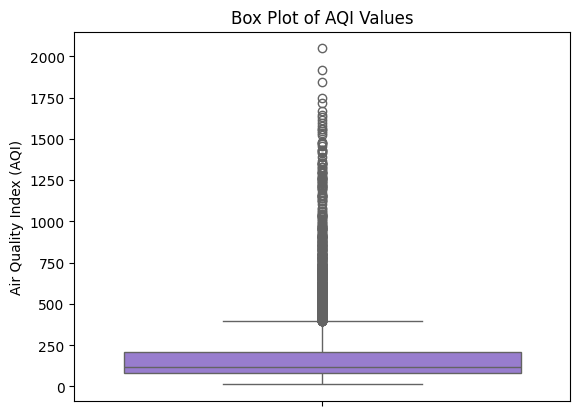

In [75]:
#making a box plot
plt.figure()
sns.boxplot(y=df_clean['AQI'], color='mediumpurple')  #shows spread and outliers in AQI values
plt.ylabel('Air Quality Index (AQI)')
plt.title('Box Plot of AQI Values')
plt.show()


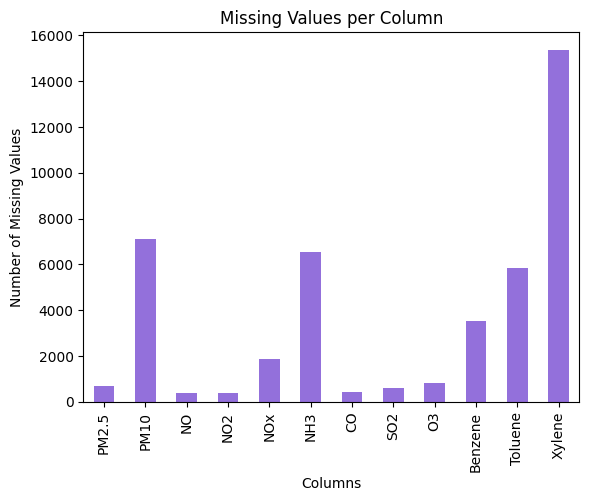

In [76]:
#calculating missing values per column
missing_values = df_clean.isnull().sum()  #counts missing values in each column

#removing columns with no missing values
missing_values = missing_values[missing_values > 0]  #keeps only columns with missing data

#making a bar chart
plt.figure()
missing_values.plot(kind='bar', color='mediumpurple')  #visualises missing values clearly
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()


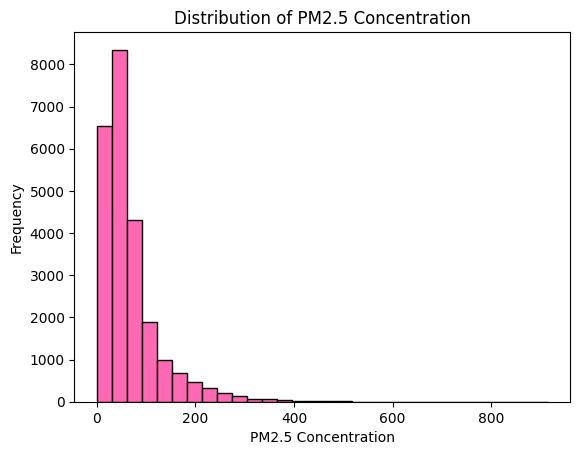

In [77]:
#making a histogram
plt.figure()
plt.hist(df_clean['PM2.5'], bins=30, color='hotpink', edgecolor='black')  #shows distribution of PM2.5 values
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Concentration')
plt.show()


In [78]:
city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)
# Groups data by city and calculates average AQI per city

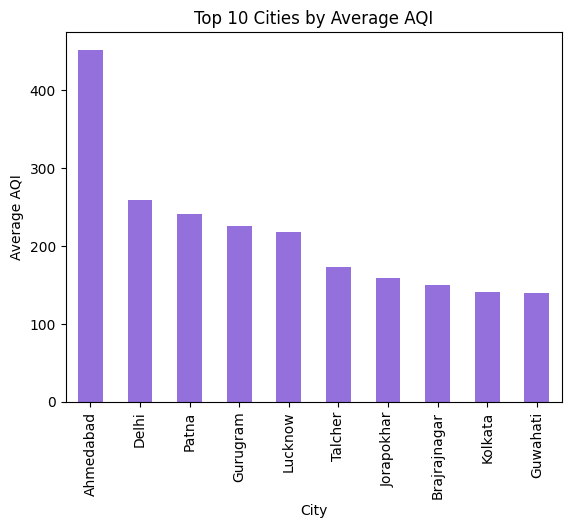

In [79]:
#make a bar chart
plt.figure()
city_avg_aqi.head(10).plot(kind='bar', color='mediumpurple') #using a bar chart for comparison
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Top 10 Cities by Average AQI')
plt.show()


These plots highlight AQI distribution patterns, pollutant relationships, and city-level differences in air quality.

---




## **Model Building**

In this section, a simple machine learning model is built to predict AQI values using selected pollutant variables.  




In [80]:
#selecting input features pollutants and target variable
features = ['PM2.5', 'PM10', 'NO2', 'CO']  #key pollutants known to influence AQI
target = 'AQI'

In [81]:
#creating feature matrix X and target vector y
X = df_clean[features]
y = df_clean[target]

In [82]:
#dropping rows with missing values only for selected features
X = X.dropna()
y = y.loc[X.index] #aligns target values with cleaned features

In [83]:
from sklearn.model_selection import train_test_split  #used to split data into training and testing sets
from sklearn.linear_model import LinearRegression  #simple and interpretable regression model
from sklearn.metrics import mean_squared_error, r2_score  #used to evaluate model performance

In [84]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test set, random state ensures reproducibility

In [85]:
#initialising the regression model and training the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
#making predictions
y_pred = model.predict(X_test)  #predicts AQI values for unseen data

In [87]:
#calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred) #measures average squared prediction error
r2 = r2_score(y_test, y_pred)             #measures proportion of variance explained
mse, r2  #displays model performance metrics


(1372.9910584405854, 0.8700815282313695)

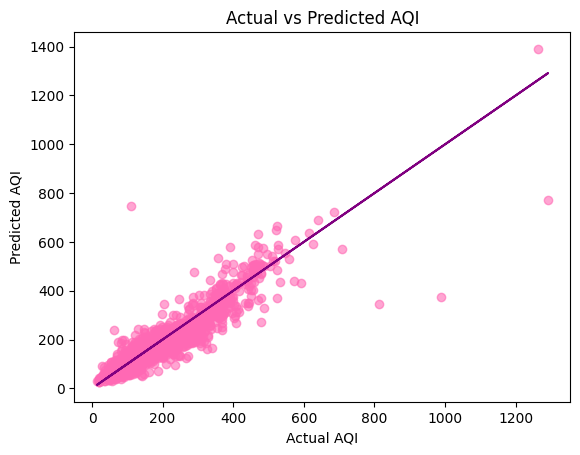

In [88]:
#visualising actual vs predicted AQI values
plt.figure()
plt.scatter(y_test, y_pred, color='hotpink', alpha=0.6) #pink scatter points
plt.plot(y_test, y_test, color='purple')                #ideal prediction line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


The linear regression model shows a positive relationship between selected pollutants and AQI, this shows the predictive influence of PM2.5 and PM10 on air quality.


---



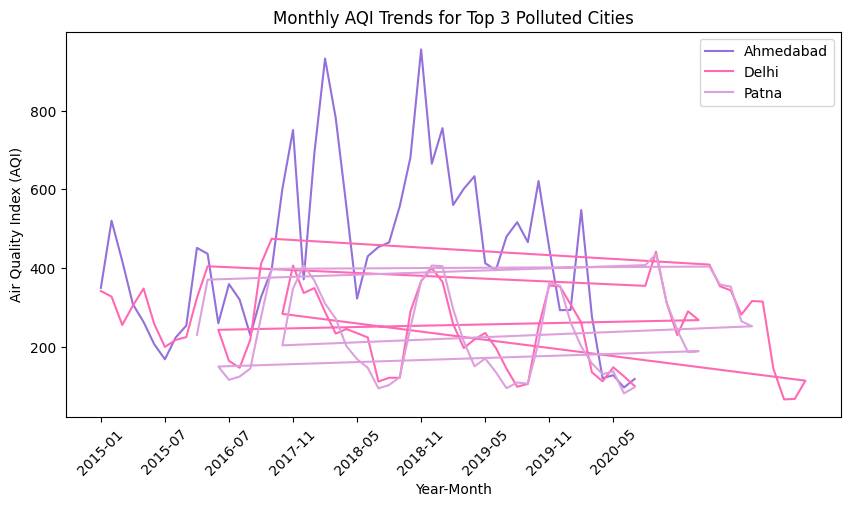

In [89]:
#converting Date column to datetime with explicit format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)  #avoids date parsing warning

#creating a year-month column
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M')  #groups data by month

#selecting top 3 cities by average AQI
top_3_cities = city_avg_aqi.head(3).index  #gets names of top polluted cities

#making a line plot
plt.figure(figsize=(10, 5))

#plotting monthly AQI trend for first city
city_data = df_clean[df_clean['City'] == top_3_cities[0]]
monthly_aqi = city_data.groupby('YearMonth')['AQI'].mean().sort_index()
plt.plot(monthly_aqi.index.astype(str), monthly_aqi.values, label=top_3_cities[0], color='mediumpurple')

#plotting monthly AQI trend for second city
city_data = df_clean[df_clean['City'] == top_3_cities[1]]
monthly_aqi = city_data.groupby('YearMonth')['AQI'].mean().sort_index()
plt.plot(monthly_aqi.index.astype(str), monthly_aqi.values, label=top_3_cities[1], color='hotpink')

#plotting monthly AQI trend for third city
city_data = df_clean[df_clean['City'] == top_3_cities[2]]
monthly_aqi = city_data.groupby('YearMonth')['AQI'].mean().sort_index()
plt.plot(monthly_aqi.index.astype(str), monthly_aqi.values, label=top_3_cities[2], color='plum')

plt.xlabel('Year-Month')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Monthly AQI Trends for Top 3 Polluted Cities')
plt.legend()

#showing fewer x-axis labels to reduce clutter
plt.xticks(range(0, len(monthly_aqi.index), 6), rotation=45)

plt.show()

**Interpretation:**  
The time series highlights persistent air quality issues in the most polluted cities, with noticeable fluctuations over time. These variations suggest seasonal effects and sustained exposure to elevated AQI levels.


---



**Model Interpretation:**

The linear regression model shows a strong positive relationship between key air pollutants (PM2.5, PM10, NO2, and CO) and AQI. The high R² score indicates that pollutant concentrations are strong predictors of air quality levels. However, some prediction error remains due to unmodelled factors such as meteorological conditions and temporal variation.

---



## **APPLICATION DEVELOPMENT (STREAMLIT)**




### **Streamlit Dashboard**
Streamlit was used to convert the exploratory analysis into an interactive dashboard. The application allows users to navigate between a dataset overview and visual analysis using a sidebar interface.

---




In [90]:
!pip install streamlit

In [91]:
import streamlit as st                 #streamlit is used to build the web application
import pandas as pd                    #used for data handling
import matplotlib.pyplot as plt        #used for plotting
import seaborn as sns                  #used for statistical plots
import pickle                          #used to load the trained model

In [92]:
#setting the title of the application
st.title('Air Quality Analysis Dashboard')  #main title shown at the top

#adding a short description
st.write('This dashboard presents exploratory data analysis of air quality data across Indian cities.')

#creating a sidebar for navigation
st.sidebar.title('Navigation')  #title for sidebar


2025-12-16 09:38:21.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.576 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-16 09:38:21.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.586 Thread 'MainThread': mi

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [93]:
#creating navigation options
page = st.sidebar.selectbox('Select a page', ['Data Overview', 'Exploratory Data Analysis'])


2025-12-16 09:38:21.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.611 Session state does not function when running a script without `streamlit run`
2025-12-16 09:38:21.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [94]:
#content for Data Overview page
if page == 'Data Overview':

    st.header('Dataset Overview')  #section header

    #showing the first few rows of the dataset
    st.write('Preview of the dataset:')
    st.dataframe(df_clean.head())  #interactive table

    #displaying dataset shape
    st.write('Number of rows and columns:')
    st.write(df_clean.shape)

    #displaying column names
    st.write('List of columns:')
    st.write(df_clean.columns)


2025-12-16 09:38:21.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:38:21.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [97]:
#content for Exploratory Data Analysis page
if page == 'Exploratory Data Analysis':

    st.header('Exploratory Data Analysis')  #section header

    #displaying AQI distribution
    st.subheader('Distribution of AQI')
    fig = plt.figure()
    plt.hist(df_clean['AQI'], bins=30, color='hotpink', edgecolor='black')  #AQI histogram
    plt.xlabel('Air Quality Index (AQI)')
    plt.ylabel('Frequency')
    plt.title('Distribution of AQI Values')

    st.pyplot(fig)  #renders matplotlib figure in Streamlit


2025-12-16 09:49:22.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:22.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:22.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:22.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:24.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:24.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:49:24.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

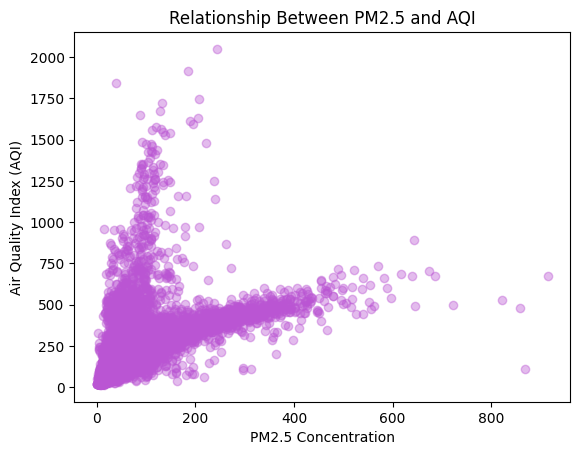

In [98]:
    #showing relationship between PM2.5 and AQI
    st.subheader('PM2.5 vs AQI')

    fig = plt.figure()
    plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='mediumorchid', alpha=0.4)  #scatter plot
    plt.xlabel('PM2.5 Concentration')
    plt.ylabel('Air Quality Index (AQI)')
    plt.title('Relationship Between PM2.5 and AQI')

    st.pyplot(fig)


In [99]:
    #showing correlation between pollutants and AQI
    st.subheader('Correlation Between Pollutants and AQI')

    fig = plt.figure(figsize=(10, 8))  #creates figure for heatmap
    sns.heatmap(correlation_matrix, annot=False, cmap='RdPu')  #pink-purple gradient heatmap
    plt.title('Correlation Heatmap of Air Pollutants and AQI')  #plot title

    st.pyplot(fig)  #display heatmap in streamlit

2025-12-16 09:52:37.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:37.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:37.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:37.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:38.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:38.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:52:38.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [100]:
    #showing average AQI by city
    st.subheader('Average AQI by City')

    fig = plt.figure()  #creates a new figure
    city_avg_aqi.head(10).plot(kind='bar', color='mediumorchid')  #top 10 cities bar chart
    plt.xlabel('City')  #x-axis label
    plt.ylabel('Average AQI')  #y-axis label
    plt.title('Top 10 Cities by Average AQI')  #plot title
    st.pyplot(fig)  #display in streamlit

2025-12-16 09:55:28.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 09:55:28.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()